# project 3
## william randall & brian chang

In [80]:
from math import sqrt
from itertools import combinations
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sklearn.metrics.cluster as smc

In [2]:
brandTotalSales_df = pd.read_csv(os.path.join('data','BrandTotalSales.csv'))
brandTotalUnits_df = pd.read_csv(os.path.join('data','BrandTotalUnits.csv'))
brandAverageRetailPrice_df = pd.read_csv(os.path.join('data','BrandAverageRetailPrice.csv'))
brandDetails_df = pd.read_csv(os.path.join('data','BrandDetails.csv'))

# brand total sales

In [3]:
brandTotalSales_df.head(5)

,Months,Brand,Total Sales ($)
0,09/2018,10x Infused,"1,711.334232"
1,09/2018,1964 Supply Co.,"25,475.21594500000"
2,09/2018,3 Bros Grow,"120,153.644757"
3,09/2018,3 Leaf,"6,063.5297850000000"
4,09/2018,350 Fire,"631,510.0481550000"


In [4]:
brandTotalSales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Months           25279 non-null  object
 1   Brand            25279 non-null  object
 2   Total Sales ($)  25279 non-null  object
dtypes: object(3)
memory usage: 592.6+ KB


In [5]:
brandTotalSales_df.describe()

,Months,Brand,Total Sales ($)
count,25279,25279,25279
unique,37,1627,25277
top,05/2021,Lift Ticket Laboratories,0
freq,848,37,3


# brand total units

In [6]:
brandTotalUnits_df.head(5)

,Brands,Months,Total Units,vs. Prior Period
0,#BlackSeries,08/2020,"1,616.3390040000000",NaN
1,#BlackSeries,09/2020,NaN,-1.000000
2,#BlackSeries,01/2021,715.5328380000000,NaN
3,#BlackSeries,02/2021,766.669135,0.071466
4,#BlackSeries,03/2021,NaN,-1.000000


In [7]:
brandTotalUnits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686 entries, 0 to 27685
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27686 non-null  object 
 1   Months            27686 non-null  object 
 2   Total Units       25712 non-null  object 
 3   vs. Prior Period  24935 non-null  float64
dtypes: float64(1), object(3)
memory usage: 865.3+ KB


In [8]:
brandTotalUnits_df.describe()

,vs. Prior Period
count,24935.000000
mean,0.265306
std,3.291373
min,-1.000000
25%,-0.351822
50%,-0.055216
75%,0.240113
max,250.792020


# brand average retail price

In [9]:
brandAverageRetailPrice_df.head(5)

,Brands,Months,ARP,vs. Prior Period
0,#BlackSeries,08/2020,15.684913,NaN
1,#BlackSeries,09/2020,NaN,-1.000000
2,#BlackSeries,01/2021,13.611428,NaN
3,#BlackSeries,02/2021,11.873182,-0.127705
4,#BlackSeries,03/2021,NaN,-1.000000


In [10]:
brandAverageRetailPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27211 entries, 0 to 27210
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27211 non-null  object 
 1   Months            27211 non-null  object 
 2   ARP               25279 non-null  float64
 3   vs. Prior Period  24499 non-null  float64
dtypes: float64(2), object(2)
memory usage: 850.5+ KB


In [11]:
brandAverageRetailPrice_df.describe()

,ARP,vs. Prior Period
count,25279.000000,24499.000000
mean,22.679732,-0.065028
std,19.802724,0.388923
min,0.000000,-1.000000
25%,10.512827,-0.088073
50%,17.033051,-0.011649
75%,31.505612,0.045232
max,700.874984,12.645741


# brand details

In [12]:
brandDetails_df.head(5)

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
0,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),"1,103.964857",...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
1,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),674.645211,...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
2,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"2,473.699102",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
3,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"14,589.916417",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
4,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Afghan Kush - Wax,145.39627,...,0,0,THC Only,NaN,Afghan Kush,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99


In [13]:
brandDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144977 entries, 0 to 144976
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State                144977 non-null  object 
 1   Channel              144977 non-null  object 
 2   Category L1          144977 non-null  object 
 3   Category L2          144977 non-null  object 
 4   Category L3          144245 non-null  object 
 5   Category L4          102618 non-null  object 
 6   Category L5          50135 non-null   object 
 7   Brand                144977 non-null  object 
 8   Product Description  144977 non-null  object 
 9   Total Sales ($)      144977 non-null  object 
 10  Total Units          144977 non-null  object 
 11  ARP                  144977 non-null  float64
 12  Flavor               7807 non-null    object 
 13  Items Per Pack       144977 non-null  int64  
 14  Item Weight          64454 non-null   object 
 15  Total THC        

In [14]:
brandDetails_df.describe()

,ARP,Items Per Pack
count,144977.000000,144977.000000
mean,30.828439,1.938259
std,19.367580,17.294108
min,0.000000,0.000000
25%,16.407796,0.000000
50%,28.073823,0.000000
75%,41.781699,0.000000
max,874.800010,1000.000000


# data cleaning

## fix months

In [15]:
# make months a date time
brandTotalSales_df['Months'] = pd.to_datetime(brandTotalSales_df['Months'])
brandTotalUnits_df['Months'] = pd.to_datetime(brandTotalUnits_df['Months'])
brandAverageRetailPrice_df['Months'] = pd.to_datetime(brandAverageRetailPrice_df['Months'])

## fix total sales

In [16]:
# make total sales floats
brandTotalUnits_df['Total Units'] = pd.to_numeric(brandTotalUnits_df['Total Units'].str.replace(',','').str[:8])

In [17]:
brandTotalUnits_df.head(5)

,Brands,Months,Total Units,vs. Prior Period
0,#BlackSeries,2020-08-01,1616.3390,NaN
1,#BlackSeries,2020-09-01,NaN,-1.000000
2,#BlackSeries,2021-01-01,715.5328,NaN
3,#BlackSeries,2021-02-01,766.6691,0.071466
4,#BlackSeries,2021-03-01,NaN,-1.000000


In [18]:
brandTotalUnits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686 entries, 0 to 27685
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Brands            27686 non-null  object        
 1   Months            27686 non-null  datetime64[ns]
 2   Total Units       25712 non-null  float64       
 3   vs. Prior Period  24935 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 865.3+ KB


In [19]:
# make Total Sales ($) floats
brandTotalSales_df['Total Sales ($)'] = pd.to_numeric(brandTotalSales_df['Total Sales ($)'].str.replace(',','').str[:8])

In [20]:
brandTotalSales_df.head(5)

,Months,Brand,Total Sales ($)
0,2018-09-01,10x Infused,1711.334
1,2018-09-01,1964 Supply Co.,25475.210
2,2018-09-01,3 Bros Grow,120153.600
3,2018-09-01,3 Leaf,6063.529
4,2018-09-01,350 Fire,631510.000


In [21]:
brandTotalSales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Months           25279 non-null  datetime64[ns]
 1   Brand            25279 non-null  object        
 2   Total Sales ($)  25279 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 592.6+ KB


# brand details categorical features

In [22]:
print('brand details\n')
for i, column in enumerate(brandDetails_df.columns):
    print(column, '-'*5 + '>', len(list(brandDetails_df[column].unique())))

brand details

State -----> 1
Channel -----> 1
Category L1 -----> 5
Category L2 -----> 13
Category L3 -----> 54
Category L4 -----> 72
Category L5 -----> 39
Brand -----> 1123
Product Description -----> 32608
Total Sales ($) -----> 133144
Total Units -----> 96910
ARP -----> 131319
Flavor -----> 496
Items Per Pack -----> 33
Item Weight -----> 70
Total THC -----> 136
Total CBD -----> 149
Contains CBD -----> 2
Pax Filter -----> 3
Strain -----> 5825
Is Flavored -----> 3
Mood Effect -----> 2
Generic Vendor -----> 2
Generic Items -----> 2
$5 Price Increment -----> 22


In [23]:
print('brand details\n')
for i, column in enumerate(brandDetails_df.columns):
    uniq = list(brandDetails_df[column].unique())
    if len(uniq) > 100:
        uniq = "too big: " + str(len(uniq))
    print(column, '\n', uniq, '\n')

brand details

State 
 ['California'] 

Channel 
 ['Licensed'] 

Category L1 
 ['Inhaleables', 'Topicals', 'Ingestibles', 'All Accessories', 'Other Cannabis'] 

Category L2 
 ['Flower', 'Concentrates', 'Pre-Rolled', 'Topicals', 'Edibles', 'Devices', 'Sublinguals', 'Other Cannabis', 'Accessories', 'Non Infused Food', 'Apparel', 'Grow Supplies', 'Shake/Trim/Lite'] 

Category L3 
 ['Hybrid', 'Sativa Dominant', 'Dabbable Concentrates', 'Infused Pre-Rolled', 'Pre-Rolled', 'Vape', 'Other Topicals', 'Indica', 'Sativa', 'Sativa Leaning', 'Infused Foods', 'Indica Dominant', 'Indica Leaning', 'Candy', 'Vaporizers', 'Pipe', 'Water Pipe', 'Rolling Papers', 'Pills', 'Tinctures', 'Other', 'Beverages', 'Spray', 'Grinder', 'Storage Device', 'Creams', 'Massage Oil', 'Balms/Salves', 'Bundles/Collections', 'Lighter', 'Culinary', 'Chocolates', 'Lotions', 'Suppositories', 'Dissolvable', 'Plants', 'Gum', nan, 'Other Edibles', 'Rolling Machine', 'Pet Products', 'Cleaner', 'Pre-Loaded', 'Lubricants', 'Soap', 

# null values

In [24]:
for i, column in enumerate(brandDetails_df.columns):
    notNullL = len(brandDetails_df.loc[brandDetails_df[column].notnull()])
    l = len(brandDetails_df)
    percent = notNullL/l
    s = percent
    if percent == 1:
        s = "no null vals"
    print(column, '-'*20+'>', s)

State --------------------> no null vals
Channel --------------------> no null vals
Category L1 --------------------> no null vals
Category L2 --------------------> no null vals
Category L3 --------------------> 0.9949509232498948
Category L4 --------------------> 0.7078226201397463
Category L5 --------------------> 0.3458134738613711
Brand --------------------> no null vals
Product Description --------------------> no null vals
Total Sales ($) --------------------> no null vals
Total Units --------------------> no null vals
ARP --------------------> no null vals
Flavor --------------------> 0.053849921021955204
Items Per Pack --------------------> no null vals
Item Weight --------------------> 0.44458086455092877
Total THC --------------------> no null vals
Total CBD --------------------> no null vals
Contains CBD --------------------> no null vals
Pax Filter --------------------> 0.3055726080688661
Strain --------------------> 0.7976368665374508
Is Flavored --------------------> 0.07

# time series feature engineering

In [25]:
brands = brandTotalUnits_df['Brands'].unique()

In [26]:
brands

array(['#BlackSeries', '101 Cannabis Co.', '10x Infused', ..., 'Zlixir',
       'Zoma', 'Zuma Topicals'], dtype=object)

## create timeseries features

1. Previous Month Units
1. Delta Month Units (diff between last month and month before that)
1. Units Rolling Average (past 3 months)
1. Sales Previous Month
1. Delta Sales Month
1. Sales Rolling Average
1. Carries Inhaleables
1. Carries Topicals
1. Carries Ingestibles
1. Number Products

In [27]:
l = len(brands)
tempDf = []
featureEngineeredDf = pd.DataFrame()
for i, brand in enumerate(brands):
    print(f'{i}/{l-1}',end='\r')
    newDf = brandTotalUnits_df.where(brandTotalUnits_df.Brands==brand)
    # get units for last month
    newDf.loc[:,'Previous Month Units'] = newDf.loc[:,'Total Units'].shift(1)
    # get delta units for last month vs this month
    newDf.loc[:,'Delta Month Units'] = newDf.loc[:,'Total Units'].shift(1) - newDf.loc[:,'Total Units'].shift(2)
    # get rolling average of units
    newDf.loc[:,'Units Rolling Average'] = (newDf.loc[:,'Total Units'].shift(1) + \
                                           newDf.loc[:,'Total Units'].shift(2) + \
                                           newDf.loc[:,'Total Units'].shift(3)) / 3
    # get sales
    newDf = newDf.merge( \
                        brandTotalSales_df[brandTotalSales_df.Brand == brand], \
                        left_on='Months',right_on='Months')
    # get price
    newDf = newDf.merge( \
                        brandAverageRetailPrice_df[brandAverageRetailPrice_df.Brands == brand], \
                        left_on='Months',right_on='Months')
    # drop extra
    newDf = newDf.drop(['Brands_x'], 1)
    newDf = newDf.drop(['Brands_y'], 1)
    # get last month's average retail price
    newDf.loc[:,'Sales Previous Month'] = newDf.loc[:,'Total Sales ($)'].shift(1)
    # get delta month's average retial price
    newDf.loc[:,'Delta Sales Month'] = newDf.loc[:,'Total Sales ($)'].shift(1) - newDf.loc[:,'Total Sales ($)'].shift(2)
    # get rolling average of sales
    newDf.loc[:,'Sales Rolling Average'] = (newDf.loc[:,'Total Sales ($)'].shift(1) + \
                                            newDf.loc[:,'Total Sales ($)'].shift(2) + \
                                            newDf.loc[:,'Total Sales ($)'].shift(3)) / 3
    
    # make bools
    carriesInhaleables = 0
    carriesTopicals = 0
    carriesIngestibles = 0
    if 'Inhaleables' in brandDetails_df[brandDetails_df.Brand == brand]['Category L1'].values:
        carriesInhaleables = 1
    if 'Topicals' in brandDetails_df[brandDetails_df.Brand == brand]['Category L1'].values:
        carriesTopicals = 1
    if 'Ingestibles' in brandDetails_df[brandDetails_df.Brand == brand]['Category L1'].values:
        carriesIngestibles = 1
    newDf['Carries Inhaleables'] = carriesInhaleables
    newDf['Carries Topicals'] = carriesTopicals
    newDf['Carries Ingestibles'] = carriesIngestibles
    
    # how many products the brand has
    newDf['Number Products'] = len(brandDetails_df.loc[brandDetails_df['Brand'] == brand])
    
    # append to temp dataframe
    tempDf.append(newDf)
    
featureEngineeredDf = pd.concat(tempDf)

<ipython-input-27-20d9ff8bb8ba>:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newDf = newDf.drop(['Brands_x'], 1)
<ipython-input-27-20d9ff8bb8ba>:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  newDf = newDf.drop(['Brands_y'], 1)


In [28]:
# rename the brands column to brand
featureEngineeredDf.head(20)

,Months,Total Units,vs. Prior Period_x,Previous Month Units,Delta Month Units,Units Rolling Average,Brand,Total Sales ($),ARP,vs. Prior Period_y,Sales Previous Month,Delta Sales Month,Sales Rolling Average,Carries Inhaleables,Carries Topicals,Carries Ingestibles,Number Products
0,2020-08-01,1616.3390,NaN,NaN,NaN,NaN,#BlackSeries,25352.130,15.684913,NaN,NaN,NaN,NaN,1,0,0,4
1,2021-01-01,715.5328,NaN,NaN,NaN,NaN,#BlackSeries,9739.423,13.611428,NaN,25352.130,NaN,NaN,1,0,0,4
2,2021-02-01,766.6691,0.071466,715.5328,NaN,NaN,#BlackSeries,9102.802,11.873182,-0.127705,9739.423,-15612.707,NaN,1,0,0,4
0,2019-11-01,131.0677,NaN,NaN,NaN,NaN,101 Cannabis Co.,4465.040,34.066667,NaN,NaN,NaN,NaN,1,0,0,77
1,2020-01-01,345.4134,NaN,NaN,NaN,NaN,101 Cannabis Co.,11790.660,34.134929,NaN,4465.040,NaN,NaN,1,0,0,77
2,2020-02-01,696.6584,1.016883,345.4134,NaN,NaN,101 Cannabis Co.,20266.760,29.091388,-0.147753,11790.660,7325.620,NaN,1,0,0,77
3,2020-03-01,943.3933,0.354169,696.6584,351.2450,NaN,101 Cannabis Co.,30465.470,32.293498,0.110071,20266.760,8476.100,12174.153333,1,0,0,77
4,2020-04-01,712.4981,-0.244750,943.3933,246.7349,661.821700,101 Cannabis Co.,23465.650,32.934344,0.019844,30465.470,10198.710,20840.963333,1,0,0,77
5,2020-05-01,619.8410,-0.130045,712.4981,-230.8952,784.183267,101 Cannabis Co.,21348.390,34.441725,0.045769,23465.650,-6999.820,24732.626667,1,0,0,77
6,2020-06-01,426.1504,-0.312484,619.8410,-92.6571,758.577467,101 Cannabis Co.,14111.750,33.114497,-0.038535,21348.390,-2117.260,25093.170000,1,0,0,77


In [29]:
featureEngineeredDf.columns

Index(['Months', 'Total Units', 'vs. Prior Period_x', 'Previous Month Units',
       'Delta Month Units', 'Units Rolling Average', 'Brand',
       'Total Sales ($)', 'ARP', 'vs. Prior Period_y', 'Sales Previous Month',
       'Delta Sales Month', 'Sales Rolling Average', 'Carries Inhaleables',
       'Carries Topicals', 'Carries Ingestibles', 'Number Products'],
      dtype='object')

## create month column

In [30]:
# make a month column
getMonth = lambda val: str(val).split('-')[1]
featureEngineeredDf.insert(2, "Month", featureEngineeredDf["Months"].apply(getMonth))

In [31]:
featureEngineeredDf.columns

Index(['Months', 'Total Units', 'Month', 'vs. Prior Period_x',
       'Previous Month Units', 'Delta Month Units', 'Units Rolling Average',
       'Brand', 'Total Sales ($)', 'ARP', 'vs. Prior Period_y',
       'Sales Previous Month', 'Delta Sales Month', 'Sales Rolling Average',
       'Carries Inhaleables', 'Carries Topicals', 'Carries Ingestibles',
       'Number Products'],
      dtype='object')

# data cleaning
## drop columns which are not useful

In [32]:
# drop columns which are not useful
columnsGettingDropped = ['Months','vs. Prior Period_x', 'vs. Prior Period_y', 'ARP', 'Total Units']
for column in columnsGettingDropped:
    featureEngineeredDf = featureEngineeredDf.drop(column, axis=1)

## find nans

In [33]:
# find columns with nans
print(featureEngineeredDf.columns[featureEngineeredDf.isna().any()])

Index(['Previous Month Units', 'Delta Month Units', 'Units Rolling Average',
       'Sales Previous Month', 'Delta Sales Month', 'Sales Rolling Average'],
      dtype='object')


In [34]:
brands = list(featureEngineeredDf['Brand'].unique())

In [35]:
len(brands)

1627

## drop certain brands
1. if they have less than 6 months of data
1. if they have all nans
1. if they have 0 products

In [36]:
l = len(brands)
# drop certain brands
for i,brand in enumerate(brands):
    print(f'{i}/{l-1}',end='\r')
    tempDf = featureEngineeredDf[featureEngineeredDf.Brand == brand]
    lTempDf = len(tempDf)
    if lTempDf <= 6:
        # drop it if it has less than 6 months of data
        featureEngineeredDf = featureEngineeredDf[featureEngineeredDf.Brand != brand]
        continue
    # if they have all NaN
    for column in featureEngineeredDf.columns[featureEngineeredDf.isna().any()].tolist():
        if len(list(tempDf[column].unique())) == 1:
            featureEngineeredDf = featureEngineeredDf.loc[featureEngineeredDf.Brand != brand]

# if they have 0 products
featureEngineeredDf = featureEngineeredDf.loc[featureEngineeredDf['Number Products'] != 0]

# data impution
## median impution

In [37]:
# impute the nans with median values
brands = list(featureEngineeredDf['Brand'].unique())
l = len(brands)
for i, brand in enumerate(brands):
    print(f'{i}/{l-1}',end='\r')
    for column in featureEngineeredDf.columns[featureEngineeredDf.isna().any()].tolist():
        median = featureEngineeredDf.loc[featureEngineeredDf.Brand==brand,column].median()
        featureEngineeredDf.loc[featureEngineeredDf['Brand'] == brand, column] = featureEngineeredDf.loc[featureEngineeredDf['Brand'] == brand,column].fillna(value = median)

In [38]:
# make sure there are no nulls
featureEngineeredDf[featureEngineeredDf.isna().any(axis=1)].head()

,Month,Previous Month Units,Delta Month Units,Units Rolling Average,Brand,Total Sales ($),Sales Previous Month,Delta Sales Month,Sales Rolling Average,Carries Inhaleables,Carries Topicals,Carries Ingestibles,Number Products


In [39]:
featureEngineeredDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20549 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  20549 non-null  object 
 1   Previous Month Units   20549 non-null  float64
 2   Delta Month Units      20549 non-null  float64
 3   Units Rolling Average  20549 non-null  float64
 4   Brand                  20549 non-null  object 
 5   Total Sales ($)        20549 non-null  float64
 6   Sales Previous Month   20549 non-null  float64
 7   Delta Sales Month      20549 non-null  float64
 8   Sales Rolling Average  20549 non-null  float64
 9   Carries Inhaleables    20549 non-null  int64  
 10  Carries Topicals       20549 non-null  int64  
 11  Carries Ingestibles    20549 non-null  int64  
 12  Number Products        20549 non-null  int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 2.2+ MB


# correlation matrix

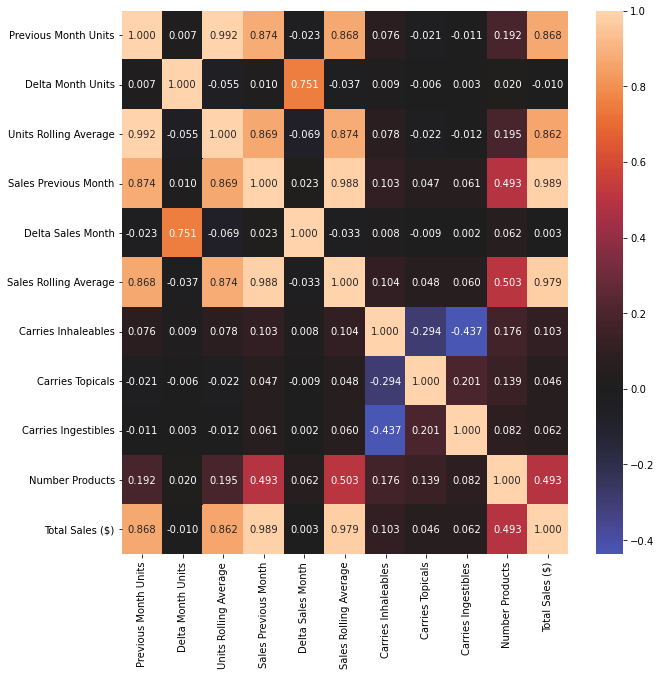

In [40]:
numericalFeatures = ['Previous Month Units', 
                     'Delta Month Units', 
                     'Units Rolling Average', 
                     'Sales Previous Month',
                     'Delta Sales Month',
                     'Sales Rolling Average',
                     'Carries Inhaleables',
                     'Carries Topicals',
                     'Carries Ingestibles',
                     'Number Products',
                     'Total Sales ($)']
correlationMatrix = featureEngineeredDf[numericalFeatures].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlationMatrix, center=0, annot=True, fmt='.3f')

# linear regression

In [41]:
numericalFeatures = ['Previous Month Units', 
                     'Delta Month Units', 
                     'Units Rolling Average', 
                     'Sales Previous Month',
                     'Delta Sales Month',
                     'Sales Rolling Average',
                     'Carries Inhaleables',
                     'Carries Topicals',
                     'Carries Ingestibles',
                     'Number Products']
categoricalFeatures = ['Month']

allPermutationsOfFeatures = sum([list(map(list,combinations(numericalFeatures, i))) for i in range(len(numericalFeatures)+1)], [])
l = len(allPermutationsOfFeatures)
bestFeatures = []
bestTrainMse = float('inf')
bestTestMse = float('inf')
for i,features in enumerate(allPermutationsOfFeatures):
    print(f'{i}/{l-1}',end='\r')
    # if it is less than 3 features just skip
    if len(features) <= 3:
        continue
    
    featuresToDrop = list(set(list(featureEngineeredDf.columns)) - set(features) - set(categoricalFeatures))
    tempDf = featureEngineeredDf.drop(featuresToDrop, axis=1).copy(deep=True)
    
    # data pipeline for numerical data
    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
    
    # full data pipeline
    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, features),
        ('cat', OneHotEncoder(), categoricalFeatures),
    ])
    
    preparedData = full_pipeline.fit_transform(tempDf)
    
    # train test split
    labels = featureEngineeredDf['Total Sales ($)'].copy()
    train_set, test_set, train_label, test_label = train_test_split(preparedData, labels, test_size=0.3, random_state=42)
    
    # perform linear regression
    linearRegression = LinearRegression()
    linearRegression.fit(train_set,train_label)
    trainPrediction = linearRegression.predict(train_set)
    testPrediction = linearRegression.predict(test_set)
    
    # get mean squared error
    trainMse = mean_squared_error(train_label, trainPrediction)
    testMse = mean_squared_error(test_label, testPrediction)
    
    # append to list of best features
    if testMse < bestTestMse:
        bestFeatures = features
        bestTrainMse = trainMse
        bestTestMse = testMse
    elif testMse == bestTestMse:
        bestFeatures.append(features)

In [44]:
print('best features', bestFeatures)
print('best train Rmse', sqrt(bestTrainMse))
print('best test Rmse', sqrt(bestTestMse))

best features ['Delta Month Units', 'Sales Previous Month', 'Sales Rolling Average', 'Carries Inhaleables', 'Carries Ingestibles']
best train Rmse 242794.64859357572
best test Rmse 298321.11231034447


# feature cross

In [ ]:
# feature cross
featureEngineeredDf['Units Average Per Product'] = featureEngineeredDf['Units Rolling Average'] * featureEngineeredDf['Product Count']

# Linear Regression

In [48]:
featureEngineeredDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20549 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  20549 non-null  object 
 1   Previous Month Units   20549 non-null  float64
 2   Delta Month Units      20549 non-null  float64
 3   Units Rolling Average  20549 non-null  float64
 4   Brand                  20549 non-null  object 
 5   Total Sales ($)        20549 non-null  float64
 6   Sales Previous Month   20549 non-null  float64
 7   Delta Sales Month      20549 non-null  float64
 8   Sales Rolling Average  20549 non-null  float64
 9   Carries Inhaleables    20549 non-null  int64  
 10  Carries Topicals       20549 non-null  int64  
 11  Carries Ingestibles    20549 non-null  int64  
 12  Number Products        20549 non-null  int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 2.2+ MB


In [57]:
numericalFeatures = ['Delta Month Units',
                     'Sales Previous Month',
                     'Sales Rolling Average',
                     'Carries Inhaleables',
                     'Carries Ingestibles']
augmentedFeature = ['Units Average Per Product']
categoricalFeatures = ['Month']

# drop features
featuresToDrop = list(set(featureEngineeredDf.columns) - set(augmentedFeature) - set(categoricalFeatures) - set(numericalFeatures))
tempDf = featureEngineeredDf.drop(featuresToDrop, axis=1).copy(deep=True)

# pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numericalFeatures),
    ('cat', OneHotEncoder(), categoricalFeatures),
])

preparedData = full_pipeline.fit_transform(tempDf)

# train test split
labels = featureEngineeredDf['Total Sales ($)'].copy()
train_set, test_set, train_label, test_label = train_test_split(preparedData,labels, test_size=0.3, random_state=42)

# linear regresssion
linearRegression = LinearRegression()
linearRegression.fit(train_set, train_label)

trainPrediction = linearRegression.predict(train_set)
testPrediction = linearRegression.predict(test_set)

# get mean squared error
trainMse = mean_squared_error(train_label, trainPrediction)
testMse = mean_squared_error(test_label, testPrediction)

print('train Rmse Linear Regression', sqrt(trainMse))
print('test Rmse Linear Regression', sqrt(testMse))
print('test r^2', metrics.r2_score(test_label, testPrediction))
print('test variance',metrics.explained_variance_score(test_label, testPrediction))

train Rmse Linear Regression 242794.64859357572
test Rmse Linear Regression 298321.11231034447
test r^2 0.9726778732765677
test variance 0.9726789176934861


# linear regression with cross validation and grid search

In [63]:
labels = np.array(labels)
fit_intercept = ['True', 'False']
positive = ['True', 'False']

parameter_grid = dict (
    fit_intercept = fit_intercept,
    positive = positive
)
linearRegression = LinearRegression()

gridSearchCV = GridSearchCV(estimator=linearRegression,
                           param_grid=parameter_grid,
                           scoring='neg_mean_absolute_error',
                           cv=10)

gridResult = gridSearchCV.fit(preparedData, labels)

In [64]:
print('best negative mae', gridResult.best_score_)
print('best hyperparameters', gridResult.best_params_)

best negative mae score -87737.11689503728
best hyperparameters {'fit_intercept': 'True', 'positive': 'True'}


# PCA

In [67]:
components = ['a','b','c','d']
pca = PCA(n_components=len(components))
principleComponents = pca.fit_transform(preparedData)
pcaDf = pd.DataFrame(data=principleComponents,columns=components)

# train test split
labels = featureEngineeredDf['Total Sales ($)'].copy()
train_set, test_set, train_label, test_label = train_test_split(principleComponents, labels, test_size=0.3, random_state=42)

#linear regression
linearRegression.fit(train_set, train_label)

trainPrediction = linearRegression.predict(train_set)
testPrediction = linearRegression.predict(test_set)

trainMse = mean_squared_error(train_label,trainPrediction)
testMse = mean_squared_error(test_label, testPrediction)

In [68]:
print('train rmse', sqrt(trainMse))
print('test rmse', sqrt(testMse))

train rmse 265053.6817623548
test rmse 319822.2039274057


# pca with cross validation through grid search

In [73]:
featureEngineeredDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20549 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  20549 non-null  object 
 1   Previous Month Units   20549 non-null  float64
 2   Delta Month Units      20549 non-null  float64
 3   Units Rolling Average  20549 non-null  float64
 4   Brand                  20549 non-null  object 
 5   Total Sales ($)        20549 non-null  float64
 6   Sales Previous Month   20549 non-null  float64
 7   Delta Sales Month      20549 non-null  float64
 8   Sales Rolling Average  20549 non-null  float64
 9   Carries Inhaleables    20549 non-null  int64  
 10  Carries Topicals       20549 non-null  int64  
 11  Carries Ingestibles    20549 non-null  int64  
 12  Number Products        20549 non-null  int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 2.2+ MB


In [77]:
pca = PCA()

linearRegression = LinearRegression()
pipeline = Pipeline(
    steps=[('pca',pca),('lin_reg',linearRegression)]
)
param_grid = {
    'pca__n_components': [2,3,4,5,6,7,8], # confused about this
    'lin_reg__fit_intercept': ['True','False'],
    'lin_reg__positive': ['True','False']
}

gridSearchCV = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10
)
gridResult = gridSearchCV.fit(preparedData, labels)

In [78]:
print('best neg mae', gridResult.best_score_)
print('best hyper params', gridResult.best_params_)

best neg mae -90316.57601300233
best hyper params {'lin_reg__fit_intercept': 'False', 'lin_reg__positive': 'False', 'pca__n_components': 5}


# random forrest